# **Assignment 5: Consumer segmentation using PCA**

### **1. Import, scale, and summarize the data. (1 point)**

In [3]:
import pandas as pd 

df = pd.read_csv("Questionaire data.csv")

df.head()

,Resp,X1,X2,X3,X4,X5
0,1,6,0,8,4,4
1,2,4,9,2,8,9
2,3,2,8,2,6,9
3,4,5,7,3,9,6
4,5,3,8,3,9,6


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #creating an “empty scaler object”, like creating a calculator
X_scaled = scaler.fit_transform(df) # .fit learns the means / standrad deviation and then .transform applies z = X−mean / sd   

# X scaled is a Numpy array thus we convert it to DataFrame for clarity
df_scaled = pd.DataFrame(X_scaled, columns=df.columns)
df_scaled.head()


,Resp,X1,X2,X3,X4,X5
0,-1.675247,0.552931,-1.706482,1.605061,-0.489698,-0.190368
1,-1.559712,-0.138233,1.285402,-0.617331,0.909439,1.594335
2,-1.444178,-0.829396,0.952971,-0.617331,0.209871,1.594335
3,-1.328644,0.207349,0.620539,-0.246932,1.259224,0.523513
4,-1.213110,-0.483814,0.952971,-0.246932,1.259224,0.523513


In [5]:
df_scaled.describe()

,Resp,X1,X2,X3,X4,X5
count,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
mean,1.480297e-17,-1.628327e-16,-1.221245e-16,4.440892e-17,-8.511710e-17,4.440892e-17
std,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00
min,-1.675247e+00,-1.520560e+00,-1.706482e+00,-1.358128e+00,-1.888836e+00,-1.618131e+00
25%,-8.376234e-01,-8.293962e-01,-8.754034e-01,-6.173310e-01,-1.014375e+00,-9.042494e-01
50%,0.000000e+00,2.073491e-01,2.881074e-01,-2.469324e-01,2.098706e-01,-1.903683e-01
75%,8.376234e-01,8.985126e-01,8.698628e-01,7.716637e-01,9.094394e-01,5.235128e-01
max,1.675247e+00,1.589676e+00,1.285402e+00,1.975459e+00,1.259224e+00,1.594335e+00


### **2. Present the matrix of correlations for the five variables (X1-X5) and plot the correlations. Explain (in words) your inferences based on this exploratory analysis. (1 point)**

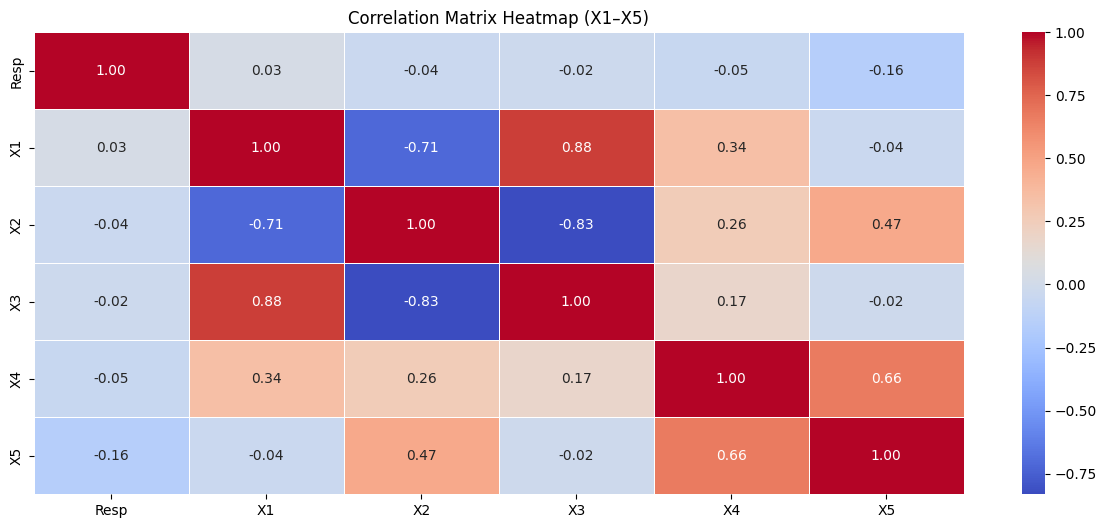

In [6]:
# correlation matrix
corr_matrix = df.corr()
corr_matrix

# plot it 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (X1–X5)")
plt.show()

**Interpretation of the correlation matrix**

The correlation matrix reveals two clear clusters of related attitudes. First, X1 (“I never go back to a store that treated me with disrespect”) and X3 (“I greatly appreciate a salesperson who spends time answering my questions”) are strongly positively correlated (0.88). This suggests a group of consumers who are highly sensitive to respectful, attentive service and value personal interaction when shopping.

In contrast, X2 (“I find salespeople who fawn over me irritating”) is strongly negatively correlated with both X1 (–0.71) and X3 (–0.83). Consumers who dislike salesperson interaction tend to care less about respectful treatment or assistance. This indicates an opposite attitude profile centered on independence and minimal service.

Additionally, X4 (“I care little for fancy displays”) and X5 (“Discount stores are more of a bargain”) are moderately positively correlated (0.66), pointing toward a segment that is price-driven and uninterested in premium store environments.

Overall, the matrix shows meaningful relationships between variables, with two underlying attitude patterns emerging: one related to service-seeking behavior and another related to value orientation. These correlations justify using PCA, since the variables are not independent and can likely be summarized into a smaller number of latent dimensions.

### **3. Perform PCA on the data and show the results (including the summary of the PCA and the matrix showing the relationship between the factors and original attributes). (1 point)**

Personal note : PCA does not create clusters of consumers or hard groups of variables; it uses correlation patterns to construct a few new summary dimensions that concentrate the information, which we can then use to visualize or cluster consumers more easily.

In [7]:
from sklearn.decomposition import PCA

# PCA object
pca = PCA()

pca.fit(df_scaled) # fitting PCA on scaled data

pca_scores = pca.transform(df_scaled) # transforming the data

import numpy as np

print("Explained variance (eigenvalues):")
print(pca.explained_variance_)

print("\nExplained variance ratio:")
print(pca.explained_variance_ratio_)

print("\nCumulative variance ratio:")
print(np.cumsum(pca.explained_variance_ratio_))


Explained variance (eigenvalues):
[2.76538824 1.93915549 1.02199036 0.34177199 0.0966115  0.04197897]

Explained variance ratio:
[0.44553477 0.31241949 0.164654   0.05506326 0.01556519 0.00676328]

Cumulative variance ratio:
[0.44553477 0.75795427 0.92260827 0.97767153 0.99323672 1.        ]


In [8]:
# PCA loadings (components)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(df.columns))],
    index=df.columns
)

loadings

,PC1,PC2,PC3,PC4,PC5,PC6
Resp,0.031376,-0.157837,0.977991,0.131654,-0.017034,0.003811
X1,0.553862,0.231719,0.069301,-0.269679,0.724635,-0.192143
X2,-0.571199,0.201195,0.079972,-0.174659,0.463400,0.617747
X3,0.578083,0.163952,-0.039248,0.305412,-0.187706,0.713365
X4,0.013896,0.673037,0.174604,-0.551631,-0.458667,-0.040856
X5,-0.177796,0.633289,0.017582,0.694162,0.119440,-0.266265


**Interpretation:**

The PCA results show that the first two components explain most of the variation in the data, meaning consumers’ attitudes can be summarized in just two main dimensions. 

The loadings indicate that X1 and X3 contribute strongly and positively to PC1, while X2 contributes in the opposite direction, suggesting this component reflects how much shoppers value personal assistance versus independence. PC2 is mainly driven by X4 and X5, capturing a preference for simple, bargain-oriented stores. 

These patterns will guide how many components to keep and how to interpret the upcoming segmentation.

### **4. Write down the five equations that formally define the relationship between the original attributes and the factors from the PCA. (1 point)**

The principal components can be written as linear combinations of the standardized variables:

- PC1 = 0.554·X1 − 0.571·X2 + 0.578·X3 + 0.014·X4 − 0.178·X5  

- PC2 = 0.232·X1 + 0.201·X2 + 0.164·X3 + 0.673·X4 + 0.633·X5  

- PC3 = 0.069·X1 + 0.080·X2 − 0.039·X3 + 0.175·X4 + 0.018·X5  

- PC4 = −0.270·X1 − 0.175·X2 + 0.305·X3 − 0.552·X4 + 0.694·X5  

- PC5 = 0.725·X1 + 0.463·X2 − 0.188·X3 − 0.459·X4 + 0.119·X5  

### **5. How many factors or principal components should we retain? Explain your decision. (1.5 points)**

Personal note : The Kaiser criterion recommends keeping only the components whose eigenvalues are greater than 1, since these components explain more variance than a single standardized original variable. It is a heuristic rule rather than a strict mathematical law.

Based on the PCA results, we should retain two or three components, depending on the objective. The first two components explain 44.55% and 31.24% of the variance, for a total of 75.79%, which exceeds the usual 70% threshold commonly used in PCA for dimensionality reduction. This means the main structure in the data can already be captured in two dimensions.

Using the Kaiser criterion, however, we would retain three components because PC1, PC2, and PC3 all have eigenvalues greater than 1. Therefore, keeping two components is appropriate for visualization purposes, while keeping three would be justified if the goal were to preserve as much information as possible.

### **6. Can you think of intuitive names for the first and second factors? What do these factors represent? Explain how you arrived at them. Hint: Use the equations that quantify the relationship between the original attributes and the factors from the PCA (from answer to Question 4) and focus on strong correlations. (2 points)**

Looking at the loadings, the first component is mainly driven by X1 and X3, both of which have strong positive weights, while X2 has a strong negative weight. X1 and X3 describe the importance of respectful, helpful service, whereas X2 reflects discomfort with salesperson interaction. Because this component increases when people value personal assistance and decreases when they prefer to be left alone, an intuitive name for PC1 is “Attitude toward salesperson interaction.”

The second component is dominated by X4 and X5, both with large positive loadings. These two items describe a preference for simple store environments and for discount-style shopping. Since high scores on this component correspond to valuing bargains over store presentation, PC2 can be described as “Bargain orientation” or “Preference for low-service, low-frills stores.”

These names come directly from the variables that load most strongly onto each component and from the meaning of the survey statements associated with them.


### **7. Now plot all the consumers on a two-dimensional map based on the first two principal components. Label the x and y-axis using the names from your answer to the previous question. (1.5 points)**

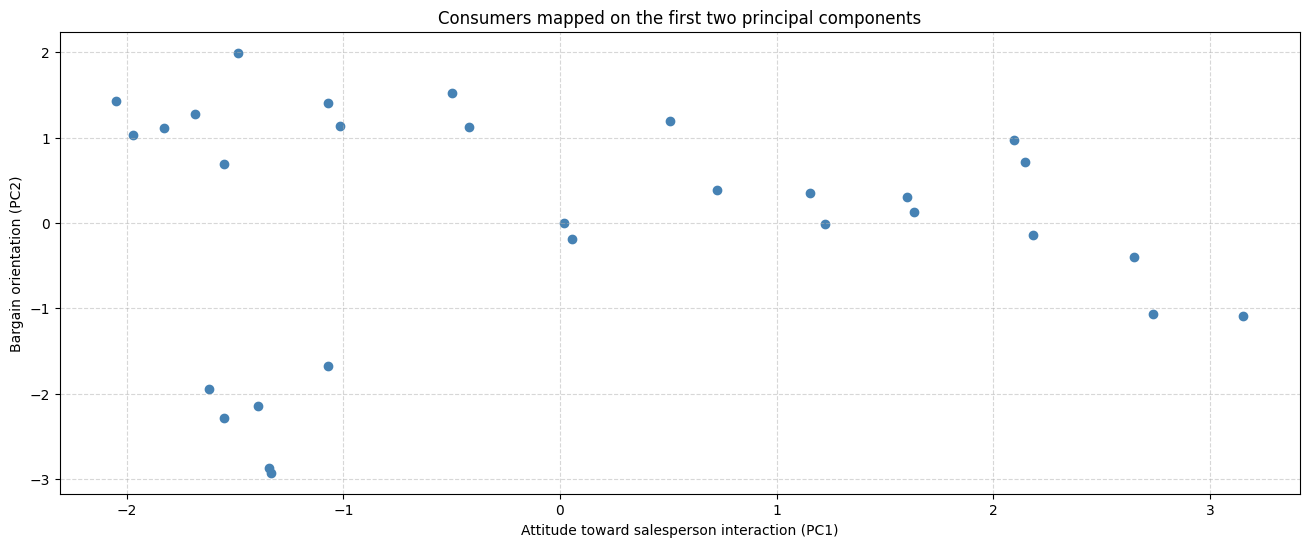

In [12]:
# extraction of the first two principal component scores 
pc1 = pca_scores[:, 0]
pc2 = pca_scores[:, 1]

plt.figure(figsize=(16,6))
plt.scatter(pc1, pc2, color="steelblue")

# labeling axes using names from Question 6
plt.xlabel("Attitude toward salesperson interaction (PC1)")
plt.ylabel("Bargain orientation (PC2)")
plt.title("Consumers mapped on the first two principal components")

# grid for readability
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

### **8. Based on the plot from the previous answer, how many segments (roughly) do you find in the market? Hint: A segment is a group of consumers who are similar to each other in their tastes and preferences. (2 points)**

Looking at the PCA map, the consumers do not form a uniform cloud; instead, several clusters appear in different parts of the space. A reasonable interpretation is that the market consists of three segments:
* Service-oriented consumers : These individuals fall on the right side of the map (high PC1). They appreciate salesperson interaction and tend to value helpful respectful service.

* Service-avoiding consumers : Located on the left side (low PC1), they prefer to shop independently and tend to dislike interaction with sales staff.

* Strong bargain-seekers : These consumers appear toward the top of the plot (high PC2). They prioritize low prices and discounts, regardless of how much salesperson involvement they prefer.

These three groups capture the main attitudinal patterns visible in the map and reflect clear differences in how consumers think about service and store value.

### **9. Describe the characteristics of each segment. Discuss the relationship between the segment characteristics and the original attributes? (2 points)**

**Segment 1: Service-oriented consumers**

These shoppers score high on PC1, which reflects strong positive loadings on X1 and X3 and a negative loading on X2. They care a great deal about respectful treatment (X1) and appreciate salespeople who take time to answer questions (X3). At the same time, they are less irritated by salesperson attention (low X2). Overall, this group values interaction and personal assistance when shopping.

**Segment 2: Service-avoiding consumers**

Consumers on the left side of the map show low PC1 scores, meaning their attitudes go in the opposite direction of Segment 1. They dislike salespeople who engage with them (high X2), and respectful or helpful service is less important to them (lower X1 and X3). This group prefers to shop independently and avoids environments with active salesperson involvement.

**Segment 3: Strong bargain-seekers**

Consumers positioned toward the top of the map score high on PC2, which is strongly driven by X4 and X5. These individuals care little about store presentation (X4) and see discount stores as offering better value (X5). Their preferences center on price and simplicity rather than service or ambiance. They may differ in their attitudes toward salesperson interaction, but they share a consistent focus on bargains.

### **10. Which segment do you expect to be the most profitable and why? Assuming the data to be representative, what is the size of this segment (in percentage)? (2 points)**

Among the three segments, the service-oriented consumers (those on the right side of the PCA map with high PC1 scores) are the segment most likely to be the most profitable. These shoppers place a high value on respectful treatment and personal assistance, meaning they respond positively to knowledgeable staff, advice, and higher-service environments. In most retail markets, customers who value service tend to be less price-sensitive and more willing to pay for better experiences, making them more attractive from a profitability standpoint. They are also more likely to develop long-term loyalty because the store’s service quality directly matches what they are looking for.

To estimate the size of this segment, we look at the number of consumers located on the right side of the PCA plot (positive PC1 values). Roughly counting the plotted points, around 10 out of 30 consumers fall clearly into this high-PC1 group. This corresponds to approximately: **10 / 3 ≈ 33%**

So, assuming the data is representative, the service-oriented segment accounts for about 33% of the market.